# Modules

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Relevant functions

Esta función nos permite visualizar las predicciones del modelo, el comportamiento de los errores y ver la normalidad de los residuos.

In [4]:
def graficos(y_train, prediccion_train,residuos_train):
# Gráficos
    # ==============================================================================
    fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(9, 8))

    axes[0, 0].scatter(y_train, prediccion_train, edgecolors=(0, 0, 0), alpha = 0.4)
    axes[0, 0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()],
                    'k--', color = 'black', lw=2)
    axes[0, 0].set_title('Valor predicho vs valor real', fontsize = 10, fontweight = "bold")
    axes[0, 0].set_xlabel('Real')
    axes[0, 0].set_ylabel('Predicción')
    axes[0, 0].tick_params(labelsize = 7)

    axes[0, 1].scatter(list(range(len(y_train))), residuos_train,
                       edgecolors=(0, 0, 0), alpha = 0.4)
    axes[0, 1].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
    axes[0, 1].set_title('Residuos del modelo', fontsize = 10, fontweight = "bold")
    axes[0, 1].set_xlabel('id')
    axes[0, 1].set_ylabel('Residuo')
    axes[0, 1].tick_params(labelsize = 7)

    sns.histplot(
        data    = residuos_train,
        stat    = "density",
        kde     = True,
        line_kws= {'linewidth': 1},
        color   = "firebrick",
        alpha   = 0.3,
        ax      = axes[1, 0]
    )

    axes[1, 0].set_title('Distribución residuos del modelo', fontsize = 10,
                         fontweight = "bold")
    axes[1, 0].set_xlabel("Residuo")
    axes[1, 0].tick_params(labelsize = 7)


    sm.qqplot(
        residuos_train,
        fit   = True,
        line  = 'q',
        ax    = axes[1, 1], 
        color = 'firebrick',
        alpha = 0.4,
        lw    = 2
    )
    axes[1, 1].set_title('Q-Q residuos del modelo', fontsize = 10, fontweight = "bold")
    axes[1, 1].tick_params(labelsize = 7)

    axes[2, 0].scatter(prediccion_train, residuos_train,
                       edgecolors=(0, 0, 0), alpha = 0.4)
    axes[2, 0].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
    axes[2, 0].set_title('Residuos del modelo vs predicción', fontsize = 10, fontweight = "bold")
    axes[2, 0].set_xlabel('Predicción')
    axes[2, 0].set_ylabel('Residuo')
    axes[2, 0].tick_params(labelsize = 7)

    # Se eliminan los axes vacíos
    fig.delaxes(axes[2,1])

    fig.tight_layout()
    plt.subplots_adjust(top=0.9)
    fig.suptitle('Diagnóstico residuos', fontsize = 12, fontweight = "bold");

# Coffee

## Data

Damos lectura a los datos de cafe y eliminamos las columnas inecesarias

In [5]:
dataCof = pd.read_csv('Datos/Cafe.csv')

In [6]:
dataCof.drop(columns='Obs.', inplace=True)

In [7]:
dataCof.head()

,Q,Y,PC,PL
0,10,120000,95,86
1,11,125000,100,89
2,12,132000,102,89
3,10,141000,101,88
4,10,142000,101,88


## Preprossesing

### Data description

In [8]:
dataCof.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Q       20 non-null     int64
 1   Y       20 non-null     int64
 2   PC      20 non-null     int64
 3   PL      20 non-null     int64
dtypes: int64(4)
memory usage: 768.0 bytes


In [9]:
dataCof.describe()

,Q,Y,PC,PL
count,20.000000,20.000000,20.000000,20.000000
mean,13.650000,162500.000000,107.850000,92.050000
std,3.801316,22926.656515,12.695938,6.621138
min,10.000000,120000.000000,95.000000,86.000000
25%,10.750000,142750.000000,99.000000,87.750000
50%,12.000000,171000.000000,101.000000,88.500000
75%,17.000000,181250.000000,117.250000,97.250000
max,21.000000,190000.000000,140.000000,107.000000


Podemos observar que no hay fluctuaciones tan grandes entre los valores de cada columna, por lo cual marcar como otliers es demasiado.
No obstante, los rangos de las variables estan muy alejados de la variable a predecir y con el fin de saber que importancia tiene en el modelo haremos un escalado de los datos.

### Relationships between variables

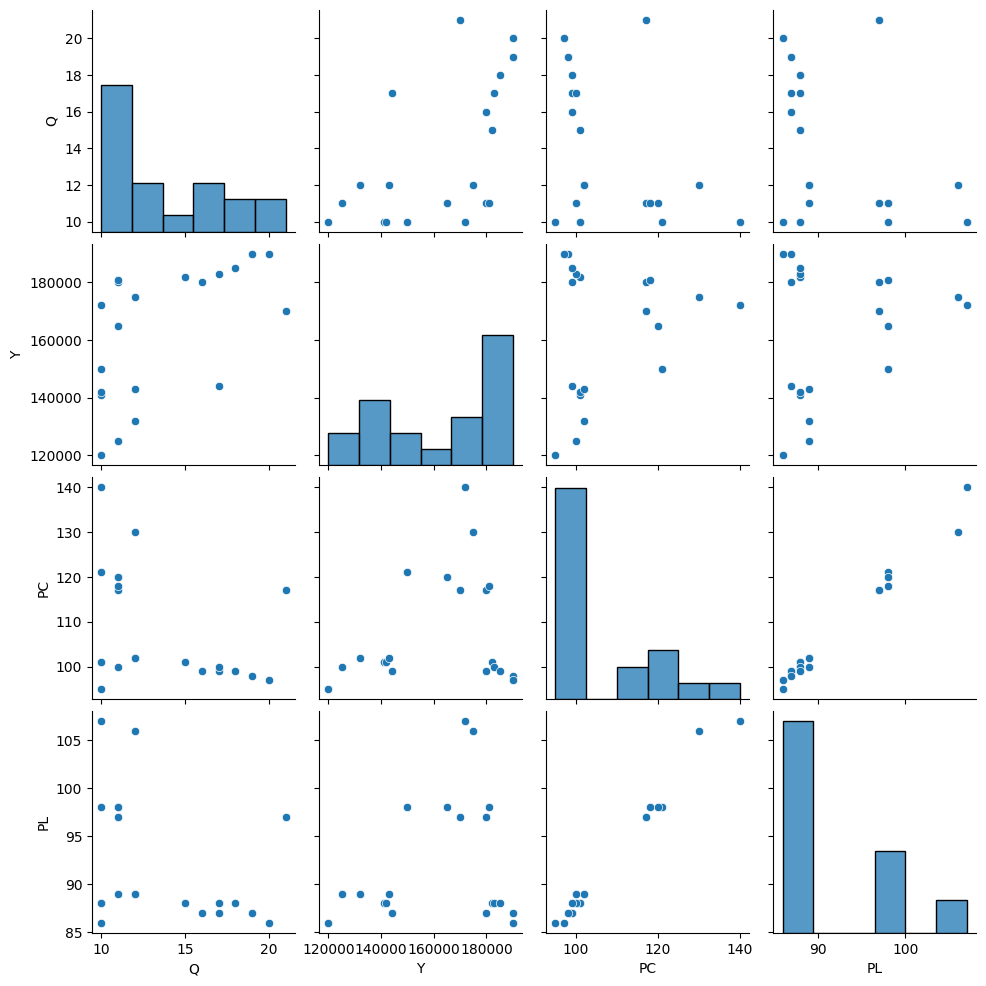

In [10]:
sns.pairplot(dataCof)

Podemos observar directamente que el precio del cafe y de la leche siguen un comportamiento muy similar, lo cual pude asignarsele el problema de multicolinealidad siendo factible solo tomar una de esas dos variables.

Otro elemento a relucir es que no se muestra una relación directa entre las variables y $Q$, añadiendo que Q no se distribuye normalmente lo más probable es que no se genere un buen modelo.

<AxesSubplot: >

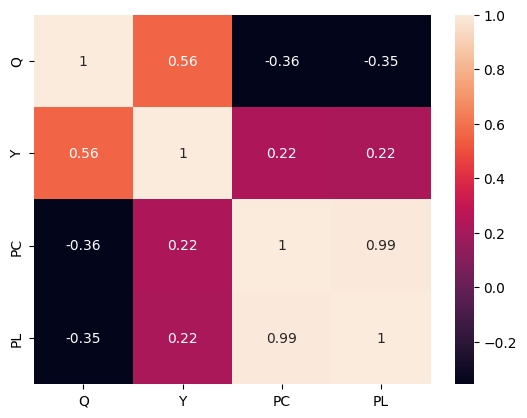

In [11]:
sns.heatmap(dataCof.corr(), annot=True)

Lo cual podemos ratificar con su matriz de correlaciones, por lo cual procedemos a eliminar la variable PL para nuestra regresión

### Drop columns

In [12]:
df_cof = dataCof.drop(columns='PL').copy()

### Scaling

Procedemos a escalar los datos para tenerlos en el mismo intervalo

In [13]:
X_cof= df_cof.iloc[:,1:].values
y_cof= df_cof.iloc[:,0].values

In [14]:
sxCof = StandardScaler().fit(X_cof)
X_cof= sxCof.transform(X_cof)

## Model

In [15]:
X_cof = sm.add_constant(X_cof, prepend=True)
lmCof = sm.OLS(endog=y_cof, exog=X_cof,)
lmCof = lmCof.fit()
print(lmCof.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.558
Model:                            OLS   Adj. R-squared:                  0.506
Method:                 Least Squares   F-statistic:                     10.71
Date:                Tue, 01 Nov 2022   Prob (F-statistic):           0.000976
Time:                        11:54:46   Log-Likelihood:                -46.418
No. Observations:                  20   AIC:                             98.84
Df Residuals:                      17   BIC:                             101.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.6500      0.598     22.837      0.0

Podemos ver que ambas variables le aportan al modelo bastante información dado que su p-value son bajos y sus intervalos de confianza no abarcan el cero.  
Por su parte aunque vemos que las variables aportan, no lo hacen lo suficiente dado que nuestra $R^2$ es bajo, por lo cual esperamos que no tenga un buen desempeño a la hora predecir

### Prediction

In [16]:
y_cof = y_cof.flatten()
prediccion_cof = lmCof.predict(exog = X_cof)
residuos_cof   = prediccion_cof - y_cof

/tmp/ipykernel_339/1716724938.py:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  axes[0, 0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()],
/home/bluterplay/.local/lib/python3.8/site-packages/statsmodels/graphics/gofplots.py:1045: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


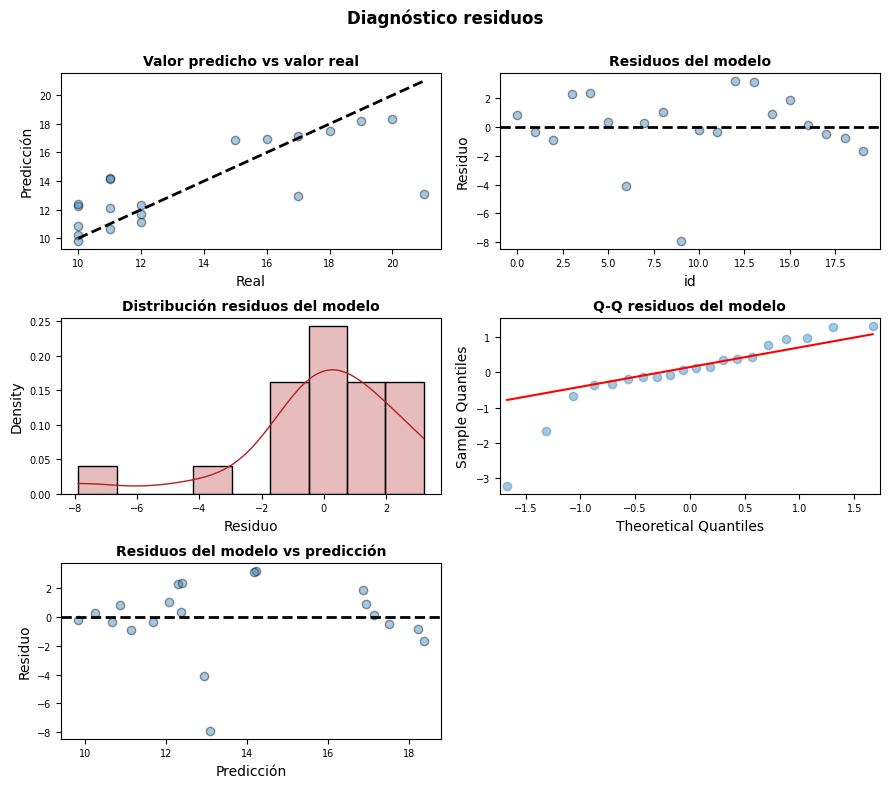

In [17]:
graficos(y_cof,prediccion_cof,residuos_cof)

Y como se esperaba al inicio las predicciones estan lejos del real, tambien los errores no muestran una distribución normal por lo cual parece no haber homocedasticidad.

## Drop highest error

Veamos como se comporta la regresión al quitar el dato que más le cuesta predecir

In [70]:
df_cof["Error"]= residuos_cof

In [75]:
df_cof_w= df_cof[abs(df_cof["Error"])<7]

### Scaling

In [76]:
X_cof_w= df_cof_w.iloc[:,1:-1].values
y_cof_w= df_cof_w.iloc[:,0].values
sxCof_w = StandardScaler().fit(X_cof_w)
X_cof_w= sxCof_w.transform(X_cof_w)

### Model

In [77]:
X_cof_w = sm.add_constant(X_cof_w, prepend=True)
lmCof_w = sm.OLS(endog=y_cof_w, exog=X_cof_w,)
lmCof_w = lmCof_w.fit()
print(lmCof_w.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.722
Method:                 Least Squares   F-statistic:                     24.43
Date:                Tue, 01 Nov 2022   Prob (F-statistic):           1.37e-05
Time:                        12:03:41   Log-Likelihood:                -36.830
No. Observations:                  19   AIC:                             79.66
Df Residuals:                      16   BIC:                             82.49
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.2632      0.420     31.557      0.0

/home/bluterplay/.local/lib/python3.8/site-packages/scipy/stats/_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


#### Prediction

In [78]:
y_cof_w = y_cof_w.flatten()
prediccion_cof_w = lmCof_w.predict(exog = X_cof_w)
residuos_cof_w   = prediccion_cof_w - y_cof_w

/tmp/ipykernel_339/1716724938.py:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  axes[0, 0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()],
/home/bluterplay/.local/lib/python3.8/site-packages/statsmodels/graphics/gofplots.py:1045: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


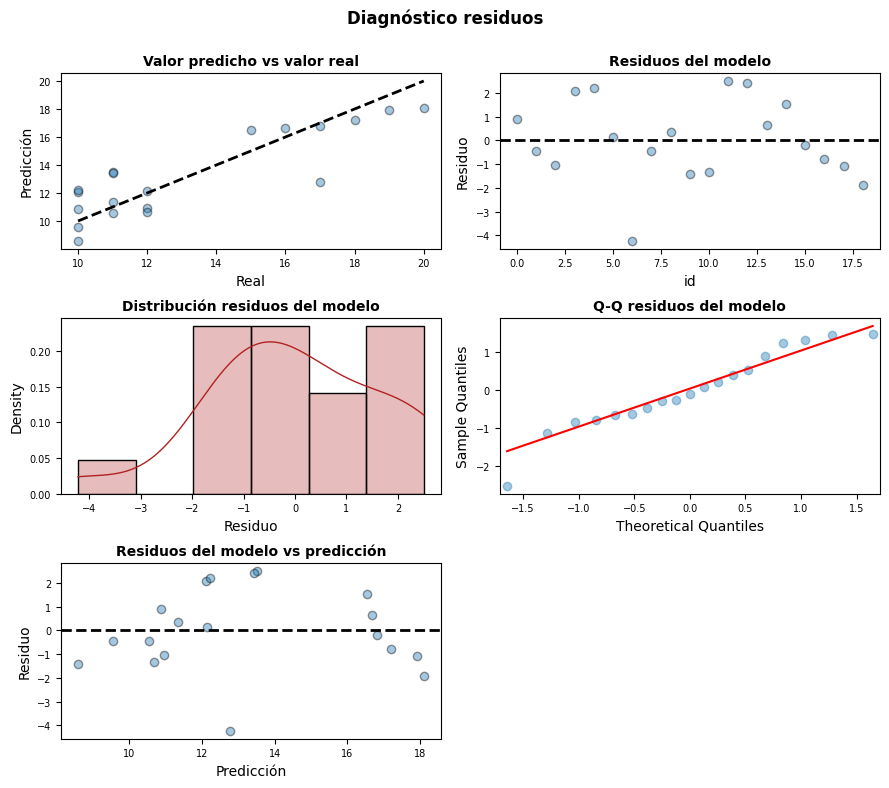

In [80]:
graficos(y_cof_w,prediccion_cof_w,residuos_cof_w)

Por último notamos una mejora en los p-values y que se distribuye un poco más normal los residuos, por lo cual podemos decir que si mejora un poco y una mejora en el $R^2$

# Alumnos

## Data

In [18]:
dataAlu = pd.read_excel("Datos/Alumnos.xlsx")

In [19]:
dataAlu.tail()

,Sexo,Edad,Prom_carr,Prom_bach,Mat_insc,Mat_apro,Tiem_tray,Esc_proc,Ingresos,Trabajo,Tiem_est,Tiem_ ej
20,0,21,7.00,7.9,27,22,60,1,1500,0,240,240
21,0,22,7.90,7.7,29,27,60,1,1250,0,360,120
22,1,20,7.90,9.8,32,30,90,1,1200,0,360,120
23,1,25,8.00,9.3,32,30,105,1,2000,0,2520,300
24,0,21,7.19,9.2,28,32,40,0,850,1,360,360


In [20]:
dataAlu["Mat_insc"][24] = 32
dataAlu["Mat_apro"][24] = 28

/tmp/ipykernel_339/881982659.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataAlu["Mat_insc"][24] = 32
/tmp/ipykernel_339/881982659.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataAlu["Mat_apro"][24] = 28


Este pequeño error que despues se corrigio, ayudo a mejorar el modelo

## Preprossesing

In [21]:
ls_cont= ['Edad', 'Prom_carr', 'Prom_bach', 'Mat_insc', 'Tiem_tray','Ingresos','Tiem_est', 'Tiem_ ej']
ls_dis= ['Sexo','Esc_proc','Trabajo']
objetivo = ['Mat_apro']

### Data description

In [22]:
dataAlu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Sexo       25 non-null     int64  
 1   Edad       25 non-null     int64  
 2   Prom_carr  25 non-null     float64
 3   Prom_bach  25 non-null     float64
 4   Mat_insc   25 non-null     int64  
 5   Mat_apro   25 non-null     int64  
 6   Tiem_tray  25 non-null     int64  
 7   Esc_proc   25 non-null     int64  
 8   Ingresos   25 non-null     int64  
 9   Trabajo    25 non-null     int64  
 10  Tiem_est   25 non-null     int64  
 11  Tiem_ ej   25 non-null     int64  
dtypes: float64(2), int64(10)
memory usage: 2.5 KB


In [23]:
dataAlu[ls_cont+objetivo].describe()

,Edad,Prom_carr,Prom_bach,Mat_insc,Tiem_tray,Ingresos,Tiem_est,Tiem_ ej,Mat_apro
count,25.00000,25.000000,25.000000,25.00,25.000000,25.000000,25.000000,25.000000,25.00000
mean,21.32000,7.802400,8.730800,30.48,70.800000,1039.200000,358.800000,189.600000,27.40000
std,1.10755,0.779307,0.817582,2.60,42.295587,661.216808,480.740054,136.853937,4.50925
min,20.00000,6.420000,6.900000,22.00,10.000000,200.000000,0.000000,0.000000,18.00000
25%,21.00000,7.190000,8.300000,30.00,40.000000,580.000000,180.000000,120.000000,25.00000
50%,21.00000,7.900000,9.000000,32.00,60.000000,850.000000,300.000000,180.000000,28.00000
75%,22.00000,8.250000,9.300000,32.00,105.000000,1400.000000,360.000000,300.000000,31.00000
max,25.00000,9.200000,9.800000,32.00,180.000000,3000.000000,2520.000000,480.000000,32.00000


### Relationships between variables

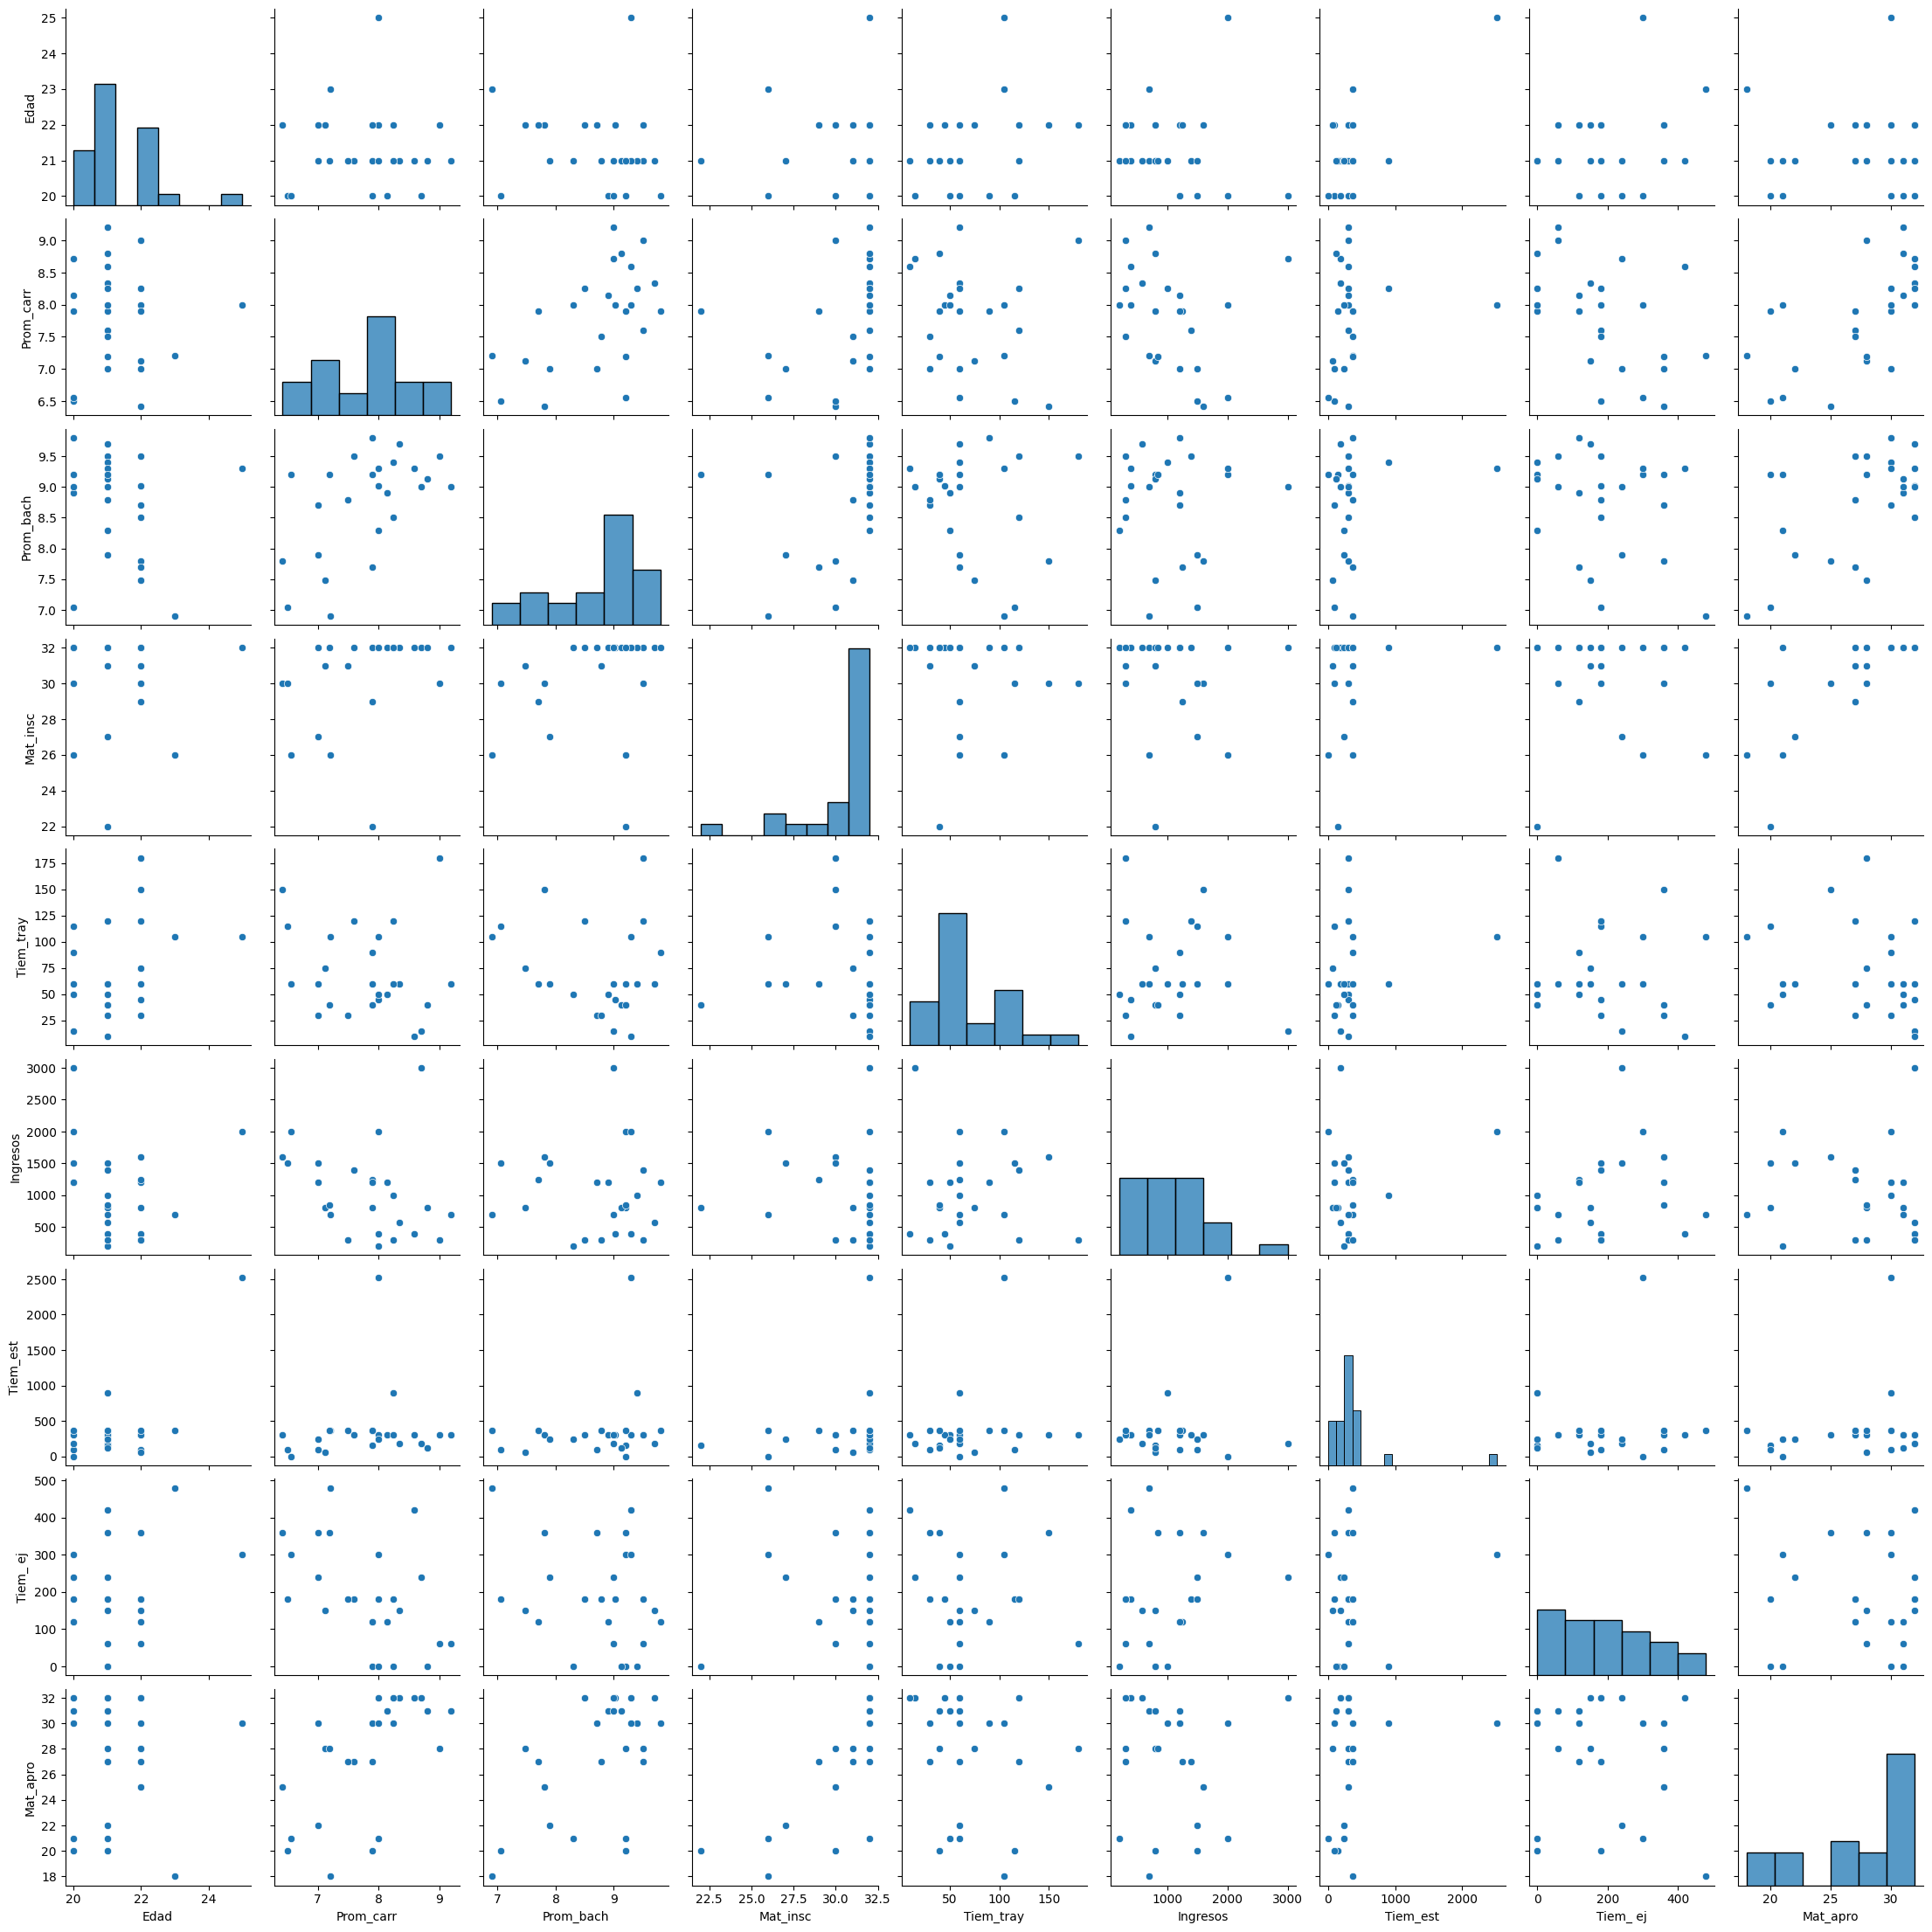

In [24]:
sns.pairplot(dataAlu[ls_cont+objetivo])

Se encuentra cierta relación entre el promedio del bachillerato y el de la universidad, veremos que se obtiene en las correlaciones

<AxesSubplot: >

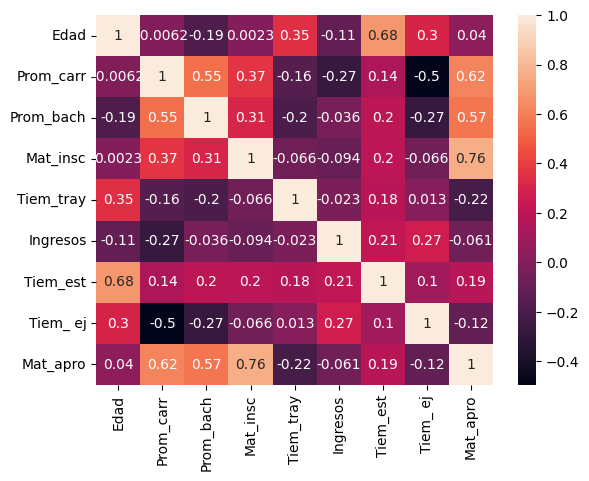

In [25]:
sns.heatmap(dataAlu[ls_cont+objetivo].corr(), annot=True)

Como se logró intuir si existe esa correlación entre los promedios y aportan un poco lo mismo a estimar las materias aprobadas.  
tambien se ve que ante mayor numero de materias inscritas se presenta mayor chance de tener más aprobadas por lo cual sugiero cambiar el enfoque u objetivo al numero de materias que se adeudan.Tambien hya que denotar que en tiempo de estudio todos suelen tener una tendencía constante, por lo cual indica que estudain aproximadamente lo mismo independientemente de las demás variables.

### New objective

Generamos una nueva variable a predecir, que será las materias que el alumno debe

In [26]:
dataAlu["MateriasFaltantes"] = abs(dataAlu["Mat_insc"] - dataAlu["Mat_apro"])

In [27]:
ls_contNew= ls_cont.copy()
ls_contNew.remove("Mat_insc")
objetivoNew = ["MateriasFaltantes"]

In [28]:
for feature in ls_dis:
        print(f'-----------------{feature}---------------')
        print(dataAlu[feature].value_counts()/len(dataAlu))

-----------------Sexo---------------
1    0.56
0    0.44
Name: Sexo, dtype: float64
-----------------Esc_proc---------------
1    0.8
0    0.2
Name: Esc_proc, dtype: float64
-----------------Trabajo---------------
0    0.8
1    0.2
Name: Trabajo, dtype: float64


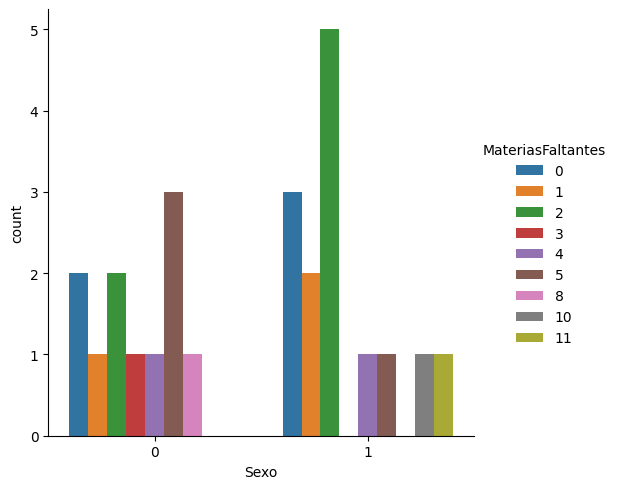

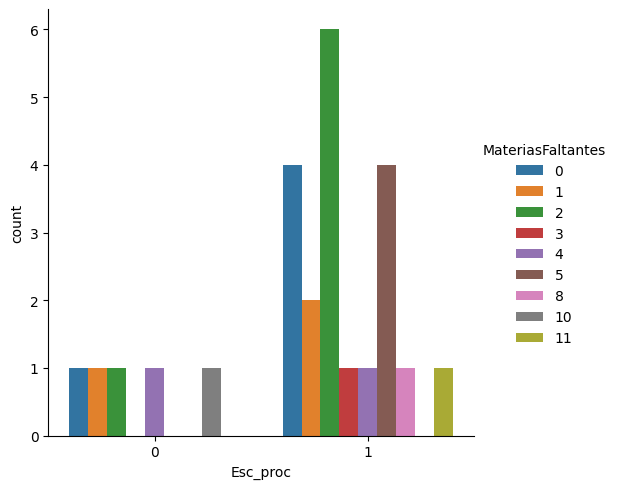

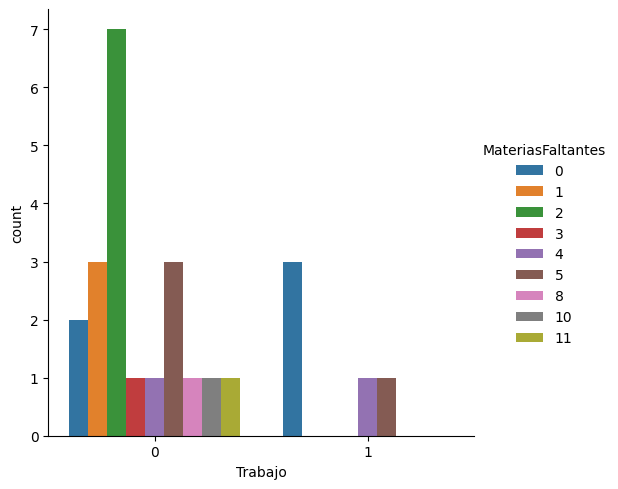

In [29]:
for feature in ls_dis:
    sns.catplot(data=dataAlu, x= feature, kind="count", hue= "MateriasFaltantes")
    plt.show()

Curiosamente los que trabajan tienen menos materias adeudadas, en cuanto a las demás tienen una distribución similar por lo cual no creo que aporten mucho, además que exceptuando al sexo, las clases estan bastantes desequilibradas por lo cual puede tomarse malas conclusiones, aún así vermeos que dice a la hora de modelar.

### New relationships

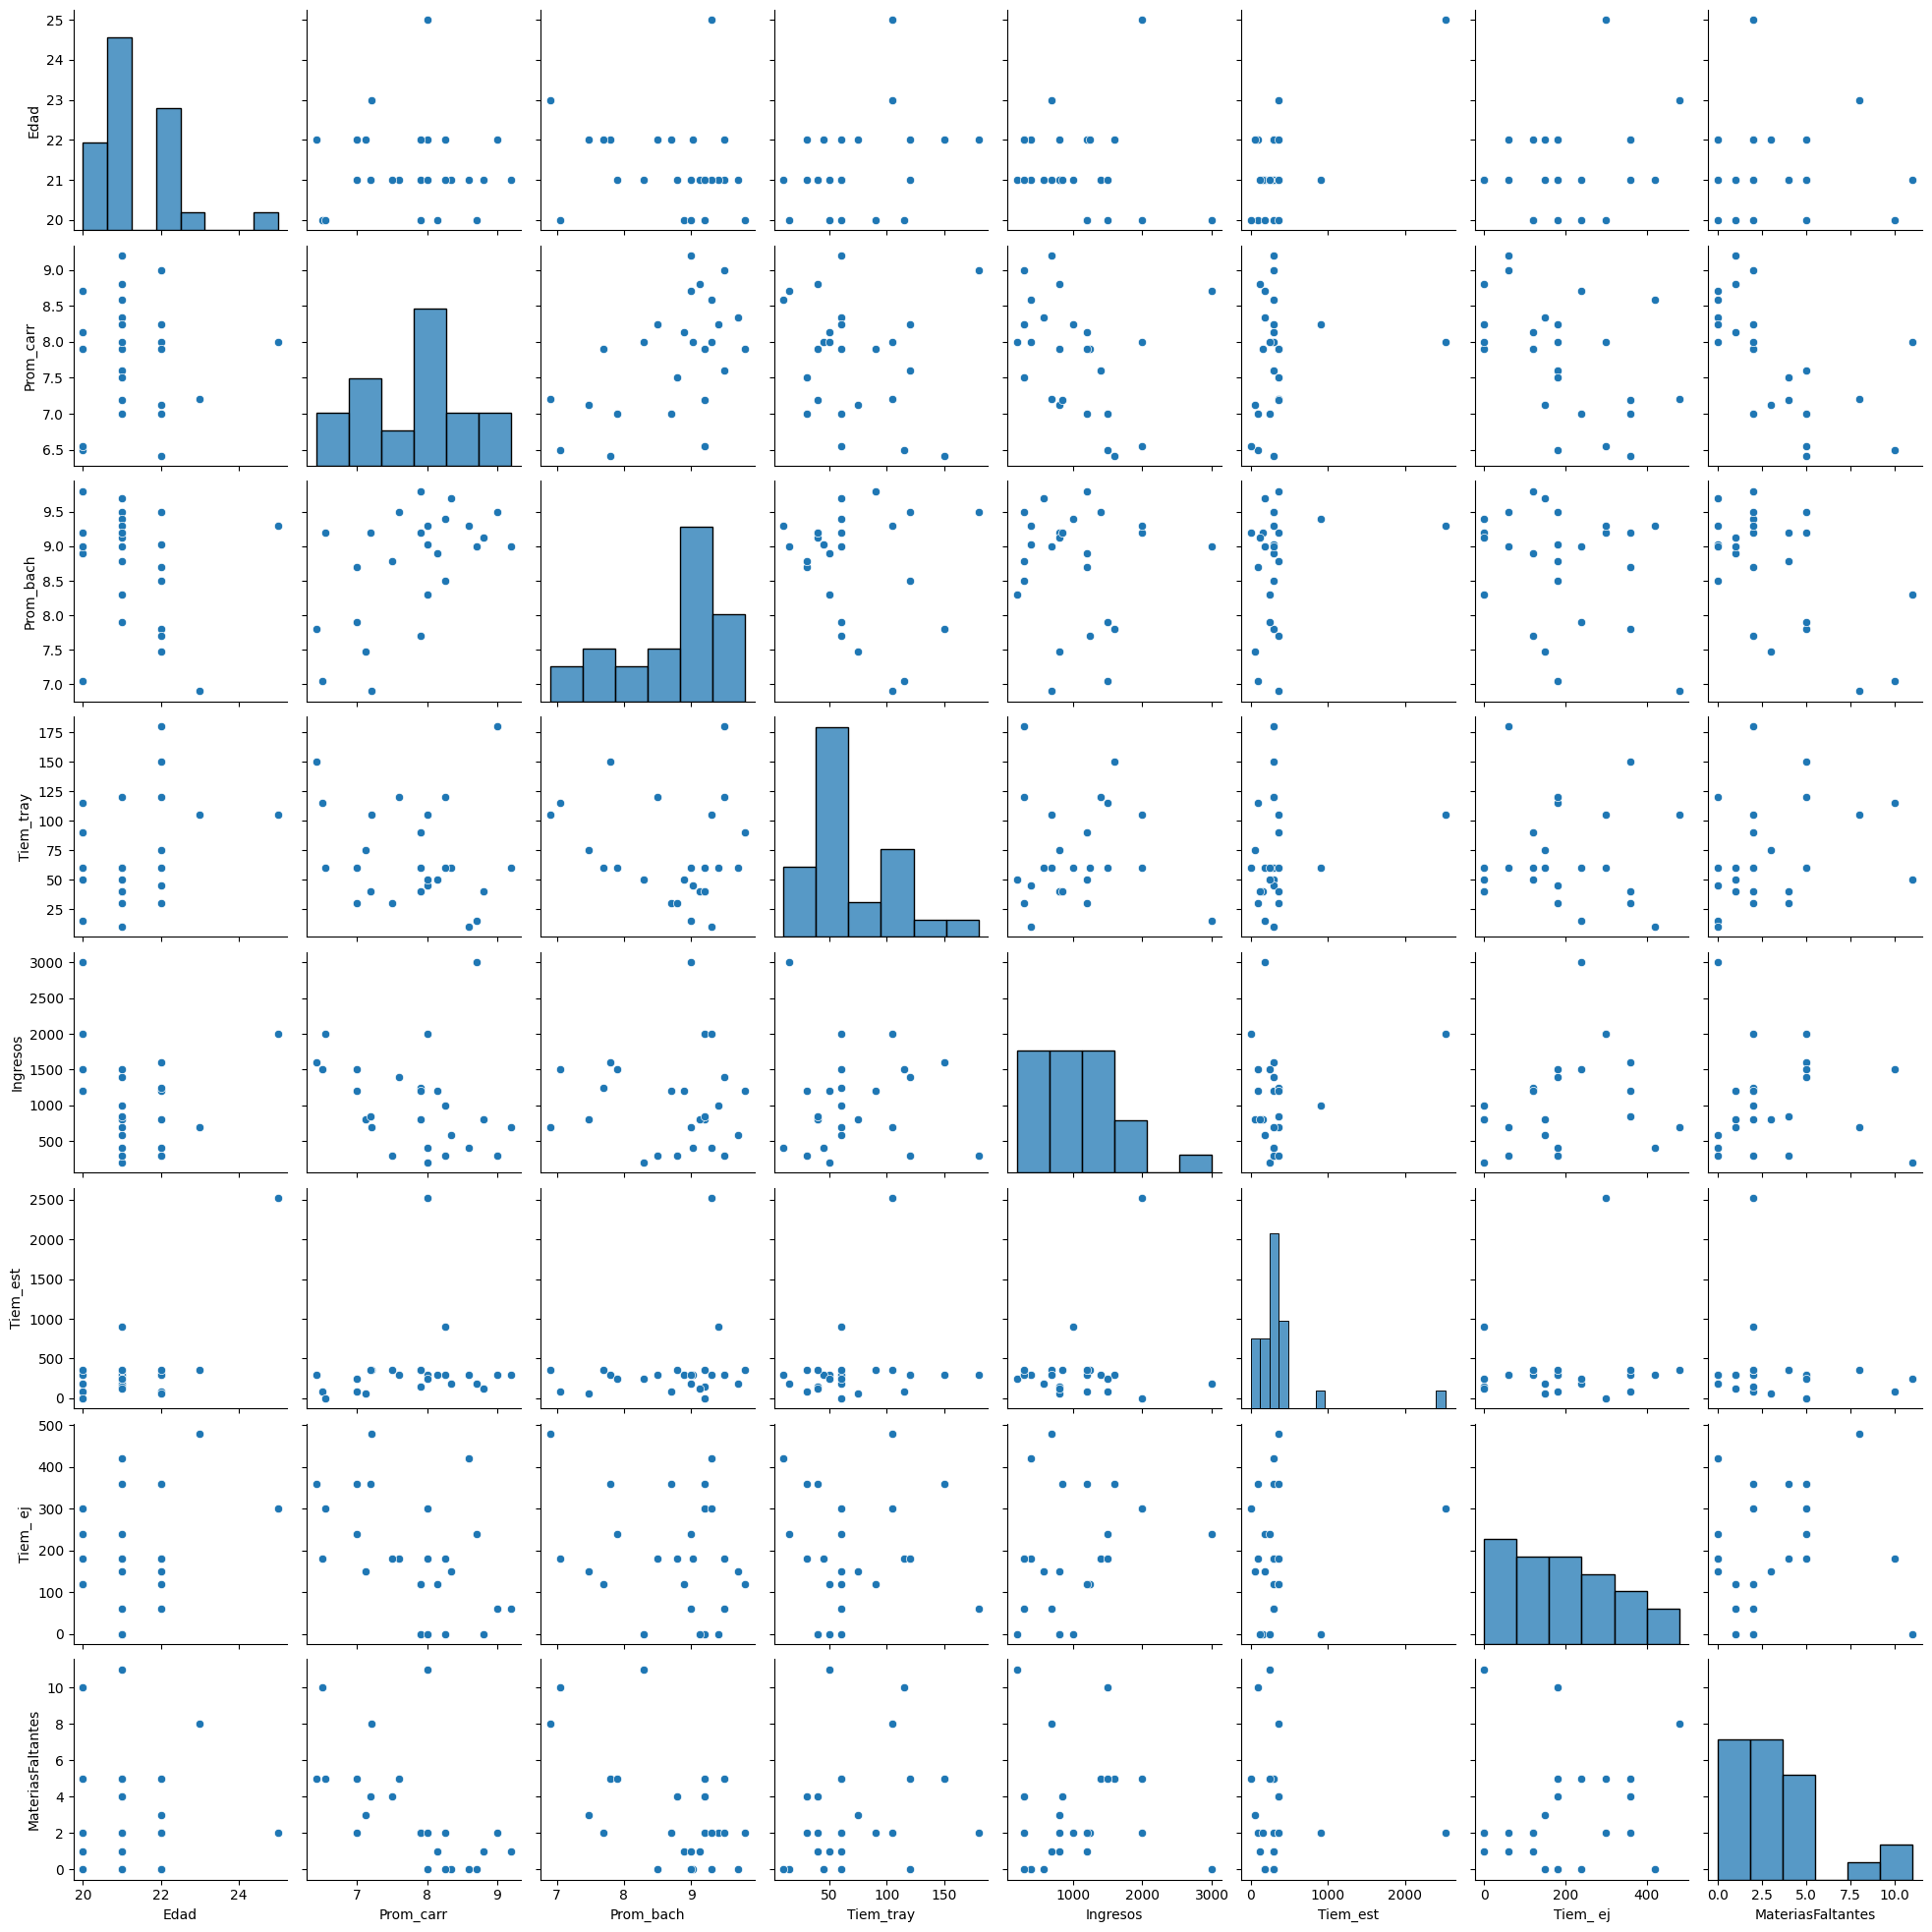

In [30]:
sns.pairplot(dataAlu[ls_contNew+objetivoNew])

<AxesSubplot: >

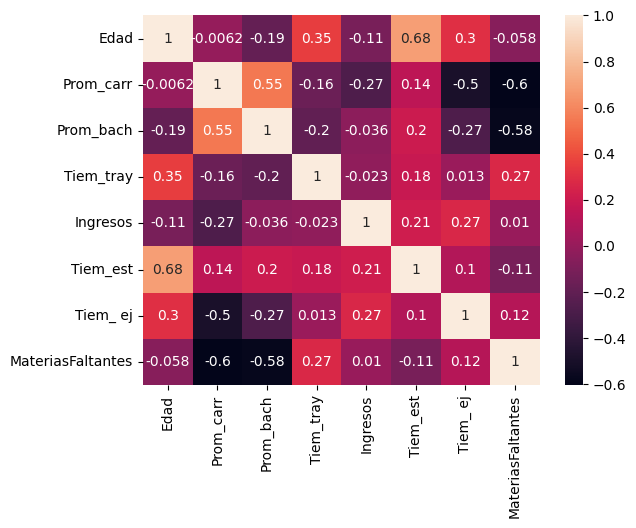

In [31]:
sns.heatmap(dataAlu[ls_contNew+objetivoNew].corr(), annot=True)

Podemos observar quels_contd no aporta suficiente pues no esta del todo relacionada con las materias faltantes, al igual que el ingreos aparentemente.Por lo cual apunta a sacar la edad, pero esperemos a ver el modelo.Ademas escalaremos para tener mayor interpretación de los coeficientes y de la influencia de la variable en el modelo.

### Scaling

#### Original

In [32]:
df_alu= dataAlu[ls_cont+ls_dis+objetivo].copy()

In [33]:
X_alu= df_alu[ls_cont+ls_dis].values
y_alu= df_alu[objetivo].values

In [34]:
sxalu = StandardScaler().fit(X_alu[:,:-3])
X_alu[:,:-3]= sxalu.transform(X_alu[:,:-3])

#### New

In [35]:
df_aluN= dataAlu[ls_contNew+ls_dis+objetivoNew].copy()

In [36]:
X_aluN= df_aluN[ls_contNew+ls_dis].values
y_aluN= df_aluN[objetivoNew].values

In [37]:
sxaluN = StandardScaler().fit(X_aluN[:,:-3])
X_aluN[:,:-3]= sxaluN.transform(X_aluN[:,:-3])

## Model

### Original

In [38]:
X_alu = sm.add_constant(X_alu, prepend=True)
lmalu = sm.OLS(endog=y_alu, exog=X_alu,)
lmalu = lmalu.fit()
print(lmalu.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.684
Method:                 Least Squares   F-statistic:                     5.730
Date:                Tue, 01 Nov 2022   Prob (F-statistic):            0.00206
Time:                        11:55:57   Log-Likelihood:                -50.539
No. Observations:                  25   AIC:                             125.1
Df Residuals:                      13   BIC:                             139.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         26.4709      1.897     13.955      0.0

#### Best model

In [39]:
lmalu = sm.OLS(endog=y_alu, exog=X_alu[:,[0,1,2,3,4,5,8,9,10]],)
lmalu = lmalu.fit()
print(lmalu.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     7.955
Date:                Tue, 01 Nov 2022   Prob (F-statistic):           0.000243
Time:                        11:55:57   Log-Likelihood:                -52.554
No. Observations:                  25   AIC:                             123.1
Df Residuals:                      16   BIC:                             134.1
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         27.6927      1.400     19.775      0.0

Despues de este punto quitando las variables que tienen el p_value más alto empiezana empeorar bastante el algoritmo y aumenta el intervalo de todos los estimadores, por lo cual lo dejeramos como el óptimo

#### Predicción

In [40]:
y_alu = y_alu.flatten()
prediccion_alu = lmalu.predict(exog = X_alu[:,[0,1,2,3,4,5,8,9,10]])
residuos_alu  = prediccion_alu - y_alu

In [41]:
print("Se usaron en el modelos las variables:")
for var in [1,2,3,4,5,8,9,10]:
    if var<8:
        print(ls_cont[var-1])
    else:
        print(ls_dis[var-8])

Se usaron en el modelos las variables:
Edad
Prom_carr
Prom_bach
Mat_insc
Tiem_tray
Sexo
Esc_proc
Trabajo


/tmp/ipykernel_339/1716724938.py:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  axes[0, 0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()],
/home/bluterplay/.local/lib/python3.8/site-packages/statsmodels/graphics/gofplots.py:1045: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


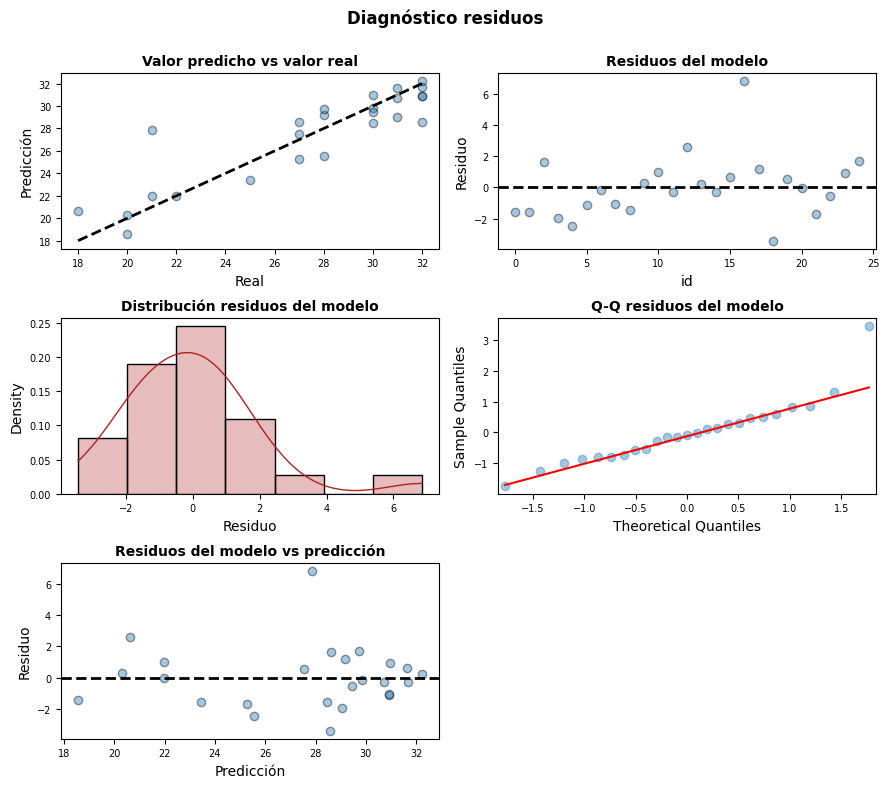

In [42]:
graficos(y_alu,prediccion_alu,residuos_alu)

En este modelo si tenemos un comportamiento casi normal en los errores lo cual habla de que la hipotesis sobre los errores se cumple, aún así termina ser sin ser un buen modelo, debido a la naturaleza de los datos.

### New

In [43]:
X_aluN = sm.add_constant(X_aluN, prepend=True)
lmaluN = sm.OLS(endog=y_aluN, exog=X_aluN,)
lmaluN = lmaluN.fit()
print(lmaluN.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.348
Method:                 Least Squares   F-statistic:                     2.279
Date:                Tue, 01 Nov 2022   Prob (F-statistic):             0.0774
Time:                        11:55:58   Log-Likelihood:                -50.571
No. Observations:                  25   AIC:                             123.1
Df Residuals:                      14   BIC:                             136.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.1197      1.733      2.377      0.0

In [44]:
lmaluN = sm.OLS(endog=y_aluN, exog=X_aluN[:,[0,1,2,3,4,5,6,8,9,10]])
lmaluN = lmaluN.fit()
print(lmaluN.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.390
Method:                 Least Squares   F-statistic:                     2.703
Date:                Tue, 01 Nov 2022   Prob (F-statistic):             0.0429
Time:                        11:55:59   Log-Likelihood:                -50.599
No. Observations:                  25   AIC:                             121.2
Df Residuals:                      15   BIC:                             133.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.1552      1.665      2.495      0.0

#### Best model

In [45]:
lmaluN = sm.OLS(endog=y_aluN, exog=X_aluN[:,[0,1,2,3,5,6]])
lmaluN = lmaluN.fit()
print(lmaluN.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.566
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     4.962
Date:                Tue, 01 Nov 2022   Prob (F-statistic):            0.00449
Time:                        11:55:59   Log-Likelihood:                -52.206
No. Observations:                  25   AIC:                             116.4
Df Residuals:                      19   BIC:                             123.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0800      0.448      6.875      0.0

Como habíamos previsto las variables categoricas, estas son las ultimas no aportan al modelo demasiado a la hora de predecir y si seguimos eliminado variables las variables que ya eran significativas empiezan a empeorar

#### Predicción

In [46]:
y_aluN = y_aluN.flatten()
prediccion_aluN = lmaluN.predict(exog = X_aluN[:,[0,1,2,3,5,6]])
residuos_aluN  = prediccion_aluN - y_aluN

In [47]:
print("Se usaron en el modelos las variables:")
for var in [1,2,3,5,6]:
    print(ls_cont[var-1])

Se usaron en el modelos las variables:
Edad
Prom_carr
Prom_bach
Tiem_tray
Ingresos


/tmp/ipykernel_339/1716724938.py:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  axes[0, 0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()],
/home/bluterplay/.local/lib/python3.8/site-packages/statsmodels/graphics/gofplots.py:1045: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


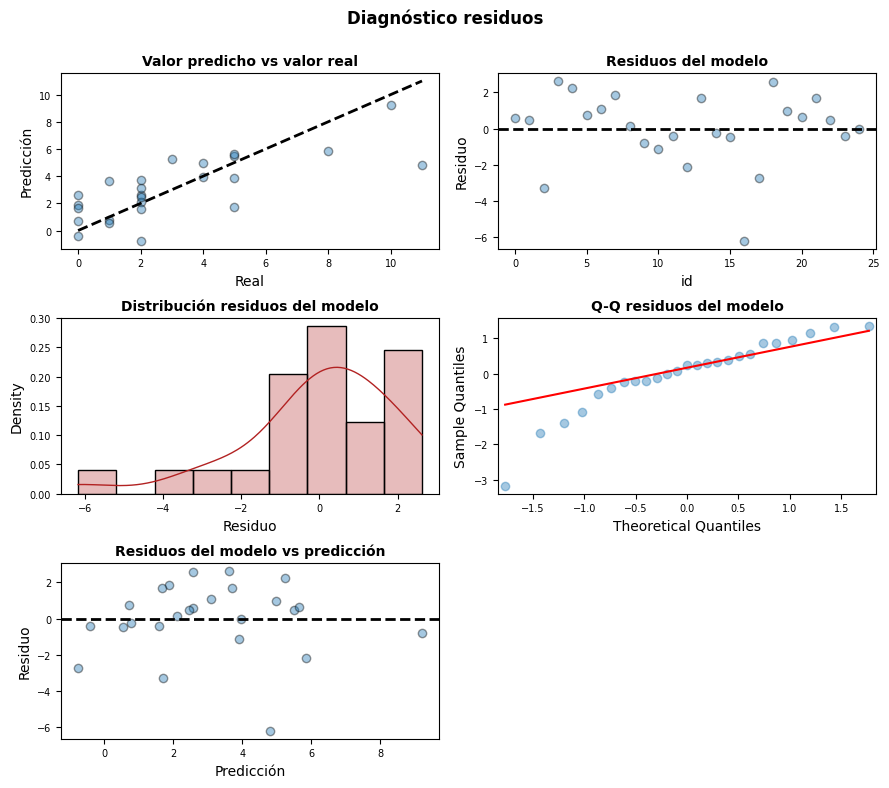

In [48]:
graficos(y_aluN,prediccion_aluN,residuos_aluN)

Notemos que esta nueva transformación aunque para el an{alisis categorico aporto mucho, en temas de predicció vuelve más dificil el problema, esto tambien se debe a que el modelo original tiene como gran ayuda las materias inscritas y acertara mejor con solo reducir cierto número a las inscritas

# Bienes raices

In [49]:
dataBienes= pd.read_csv("Datos/bienesraices.csv")

In [50]:
dataBienes.drop(columns=dataBienes.columns[-4:], inplace=True)

In [51]:
dataBienes.dropna(how='all', inplace=True)

In [52]:
dataBienes["PRECIO"]=dataBienes["PRECIO"].apply(lambda x: int(str(x).replace(",","")))

In [53]:
dataBienes.head()

,PRECIO,ZONA,TERRENO,CONSTRUCCION,RECAMARAS,BAÑOS,TV/ESTUDIO,CTO. SERVICIO,GARAGE,JARDIN,TELEFONO
0,270000,1.0,58.0,66.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
1,280000,1.0,60.0,87.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
2,285000,1.0,68.0,87.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0
3,340000,1.0,70.0,94.0,2.0,1.0,0.0,0.0,0.0,1.0,1.0
4,373824,1.0,84.0,100.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0


## Preprossesing

In [54]:
dataBienes.columns

Index(['PRECIO', 'ZONA', 'TERRENO', 'CONSTRUCCION', 'RECAMARAS', 'BAÑOS',
       'TV/ESTUDIO', 'CTO. SERVICIO', 'GARAGE', 'JARDIN', 'TELEFONO'],
      dtype='object')

In [55]:
ls_contB= ["TERRENO", "CONSTRUCCION", "RECAMARAS", "BAÑOS", "CTO. SERVICIO", "JARDIN", "TELEFONO"]
ls_disB = ["ZONA"]
objetivoB = ["PRECIO"]

### Data description

In [56]:
dataBienes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98 entries, 0 to 97
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRECIO         98 non-null     int64  
 1   ZONA           98 non-null     float64
 2   TERRENO        98 non-null     float64
 3   CONSTRUCCION   98 non-null     float64
 4   RECAMARAS      98 non-null     float64
 5   BAÑOS          98 non-null     float64
 6   TV/ESTUDIO     98 non-null     float64
 7   CTO. SERVICIO  98 non-null     float64
 8   GARAGE         98 non-null     float64
 9   JARDIN         98 non-null     float64
 10  TELEFONO       98 non-null     float64
dtypes: float64(10), int64(1)
memory usage: 9.2 KB


In [57]:
dataBienes.describe()

,PRECIO,ZONA,TERRENO,CONSTRUCCION,RECAMARAS,BAÑOS,TV/ESTUDIO,CTO. SERVICIO,GARAGE,JARDIN,TELEFONO
count,9.800000e+01,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000
mean,1.769027e+06,3.204082,479.163265,310.928571,3.612245,2.719388,0.438776,0.877551,3.051020,0.255102,1.010204
std,1.634860e+06,1.307860,837.794634,154.844867,1.328767,1.033127,0.704424,0.735903,2.007062,0.461088,0.650058
min,2.700000e+05,1.000000,58.000000,66.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.729000e+05,2.000000,160.000000,200.000000,3.000000,2.000000,0.000000,0.000000,2.000000,0.000000,1.000000
50%,1.240000e+06,4.000000,245.000000,288.000000,3.000000,2.500000,0.000000,1.000000,3.000000,0.000000,1.000000
75%,2.150000e+06,4.000000,481.250000,400.000000,4.000000,3.375000,1.000000,1.000000,4.000000,0.000000,1.000000
max,9.500000e+06,5.000000,5758.000000,808.000000,10.000000,6.000000,3.000000,4.000000,11.000000,2.000000,3.000000


### Relationships between variables

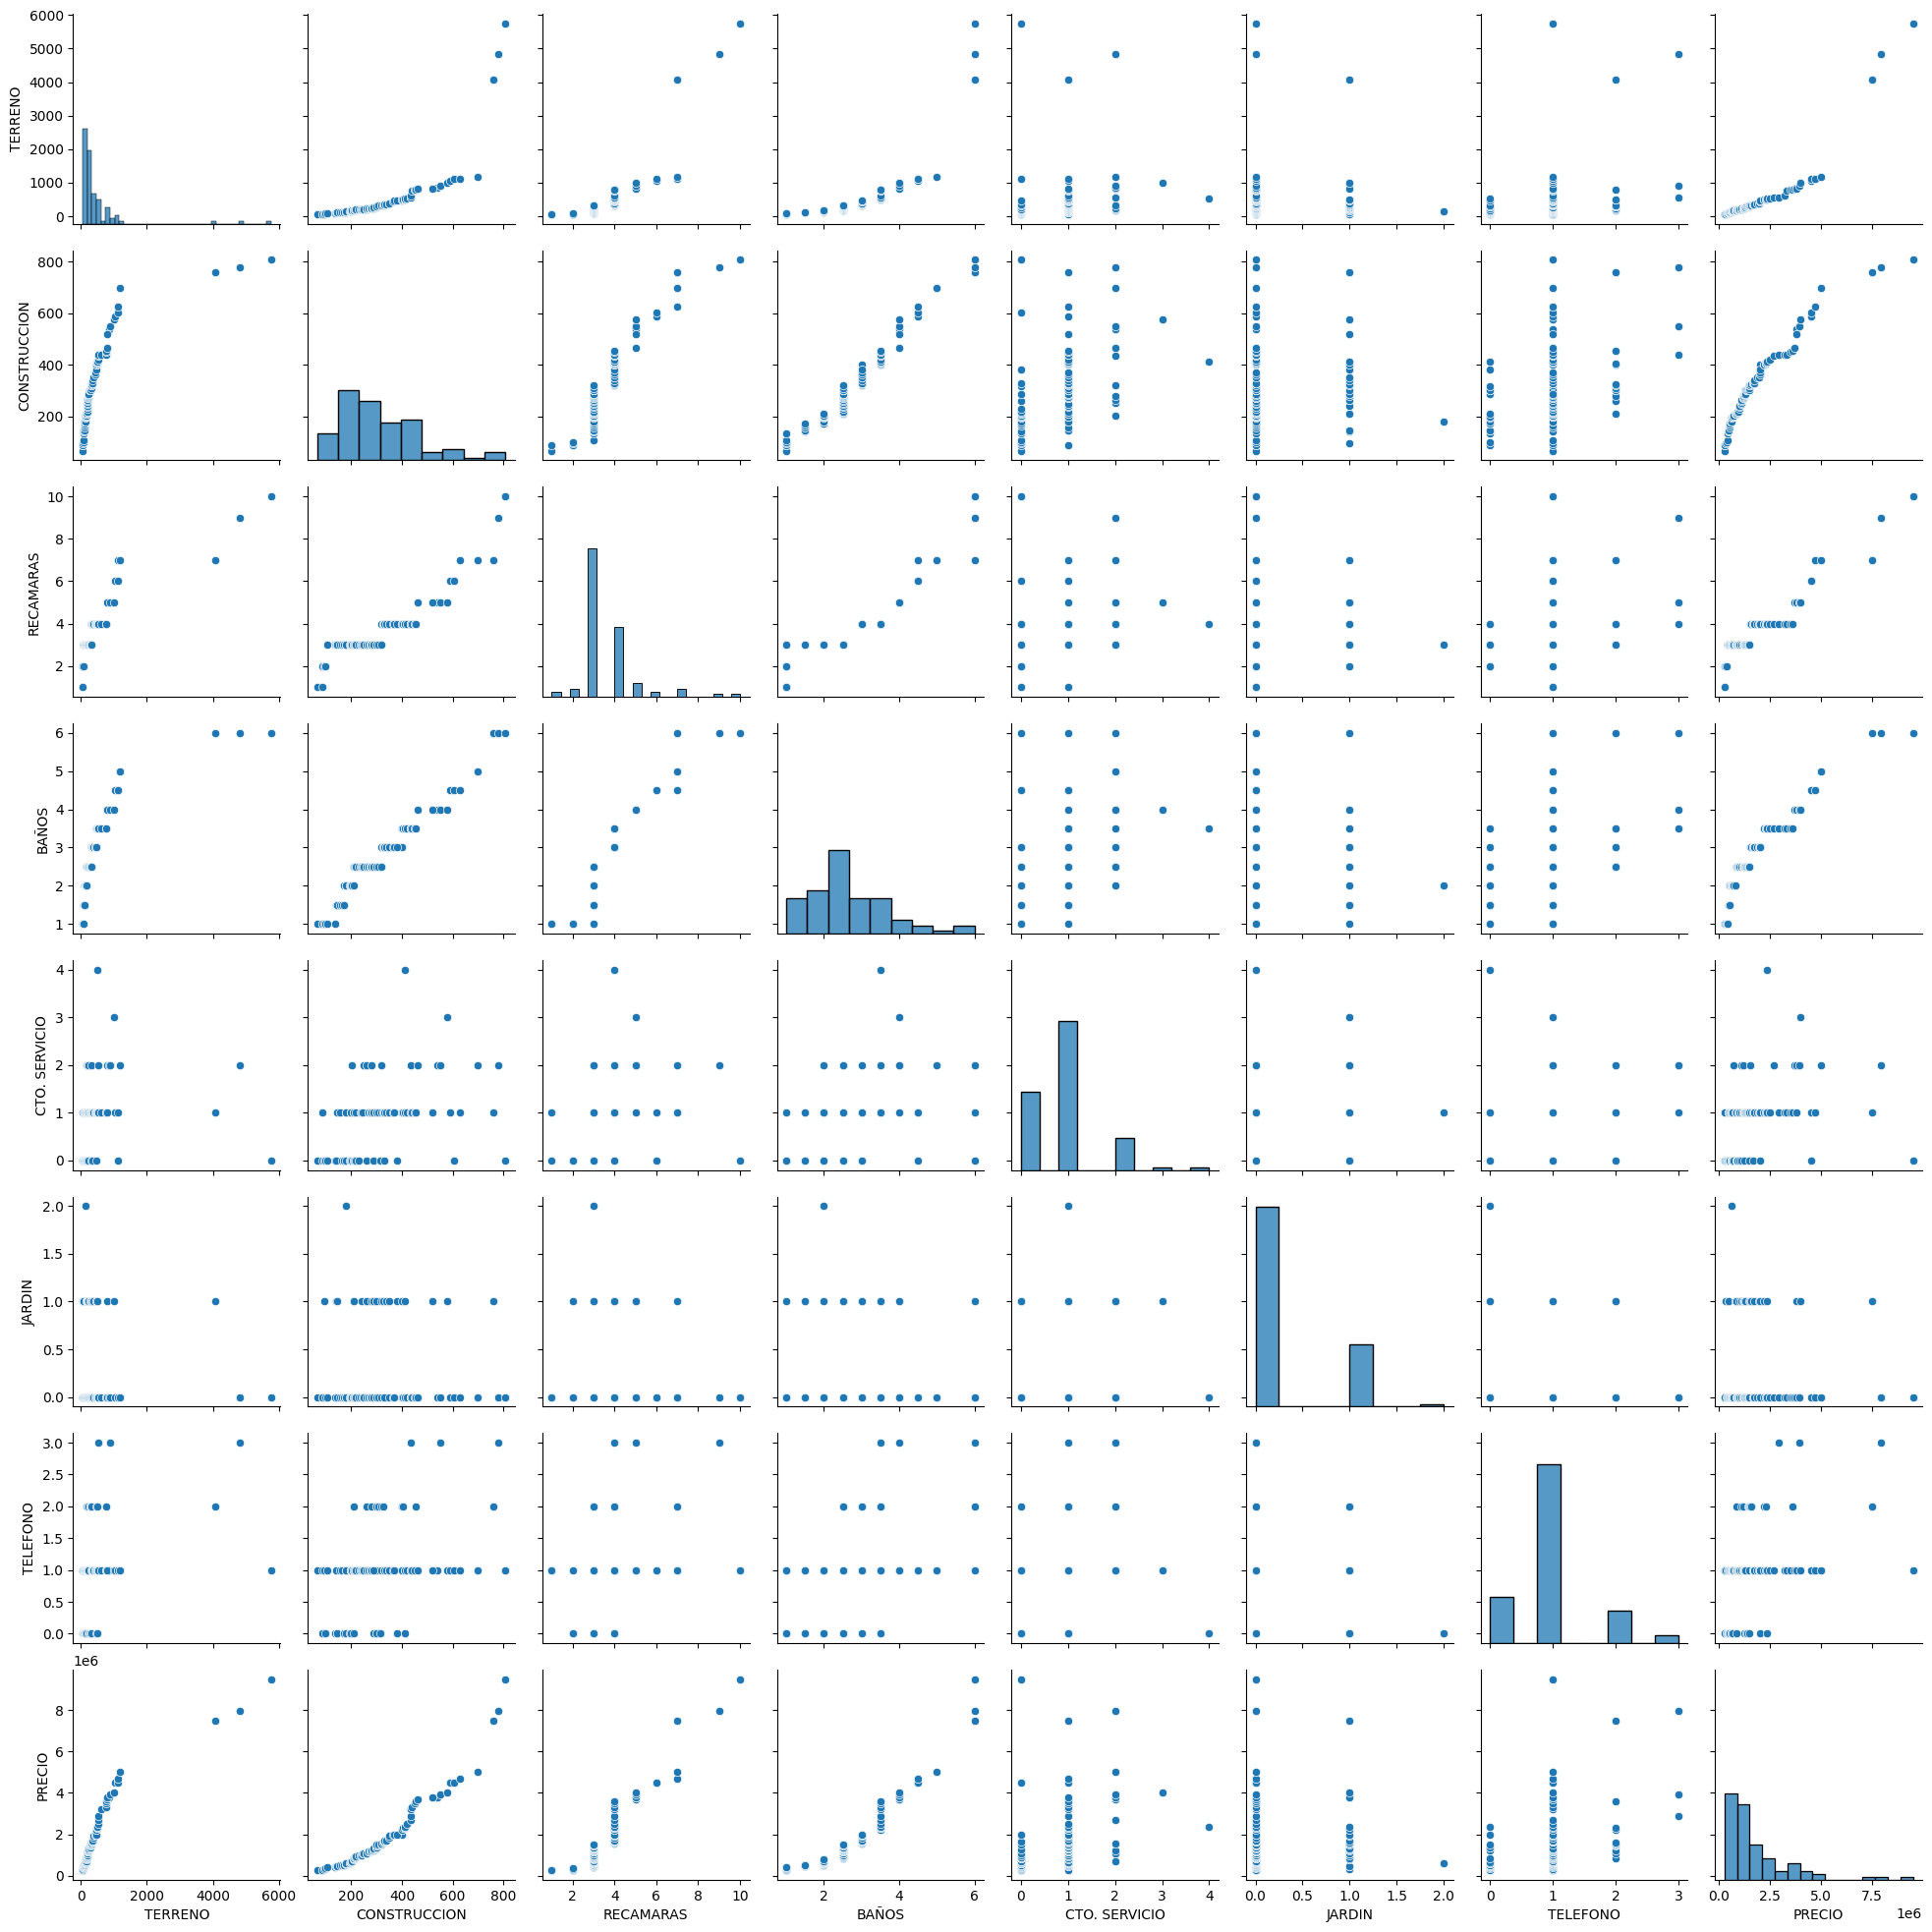

In [58]:
sns.pairplot(dataBienes[ls_contB+objetivoB])

<AxesSubplot: >

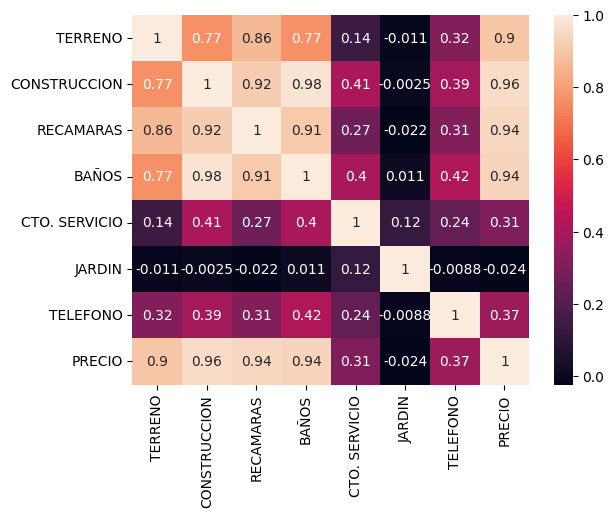

In [59]:
sns.heatmap(dataBienes[ls_contB+objetivoB].corr(), annot=True)

Aqui tenemos muchas relaciones entre sí, puesto que a mayor Terreno es más factible tener mayor cosntrucción, mas recamaras, baños, etc. Por lo cual creo adecuado quedarnos con solo lo construido, cuarto de servicio, telefono y aunque aporta poco Jardin, si se quita el terreno, puede aportar bastante a mi parecer

In [60]:
dataBienes[["ZONA", "PRECIO"]].groupby("ZONA").mean()

,PRECIO
ZONA,
1.0,3.646471e+05
2.0,7.174267e+05
3.0,1.151889e+06
4.0,1.752594e+06
5.0,4.561667e+06


En cuanto a la zona, entre mayor la zona mayor el costo por lo cual veo adecuado ese etiquetado.

### Scaling

In [61]:
ls_contB= ["CONSTRUCCION", "CTO. SERVICIO", "TELEFONO","JARDIN"]

In [62]:
df_bienes= dataBienes[ls_contB+ls_disB+objetivoB].copy()

In [63]:
X_bienes= df_bienes[ls_contB+ls_disB].values
y_bienes= df_bienes[objetivoB].values

In [64]:
sxbienes = StandardScaler().fit(X_bienes[:,:-1])
X_bienes[:,:-1]= sxbienes.transform(X_bienes[:,:-1])

## Model

In [65]:
X_bienes = sm.add_constant(X_bienes, prepend=True)
lmbienes = sm.OLS(endog=y_bienes, exog=X_bienes,)
lmbienes = lmbienes.fit()
print(lmbienes.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     357.2
Date:                Tue, 01 Nov 2022   Prob (F-statistic):           1.26e-58
Time:                        11:56:31   Log-Likelihood:                -1392.9
No. Observations:                  98   AIC:                             2798.
Df Residuals:                      92   BIC:                             2813.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.129e+06   2.01e+05     15.550      0.0

#### Best model

In [66]:
lmbienes = sm.OLS(endog=y_bienes, exog=X_bienes[:,[0,1,2,5]],)
lmbienes = lmbienes.fit()
print(lmbienes.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     603.8
Date:                Tue, 01 Nov 2022   Prob (F-statistic):           2.87e-61
Time:                        11:56:31   Log-Likelihood:                -1393.2
No. Observations:                  98   AIC:                             2794.
Df Residuals:                      94   BIC:                             2805.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.122e+06      2e+05     15.648      0.0

#### Prediction

In [67]:
y_bienes = y_bienes.flatten()
prediccion_bienes = lmbienes.predict(exog = X_bienes[:,[0,1,2,5]])
residuos_bienes  = prediccion_bienes - y_bienes

In [68]:
print("Se usaron en el modelos las variables:")
for var in [1,2,5]:
    if(var<5):
        print(ls_contB[var-1])
    else:
        print(ls_disB[0])

Se usaron en el modelos las variables:
CONSTRUCCION
CTO. SERVICIO
ZONA


/tmp/ipykernel_339/1716724938.py:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  axes[0, 0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()],
/home/bluterplay/.local/lib/python3.8/site-packages/statsmodels/graphics/gofplots.py:1045: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


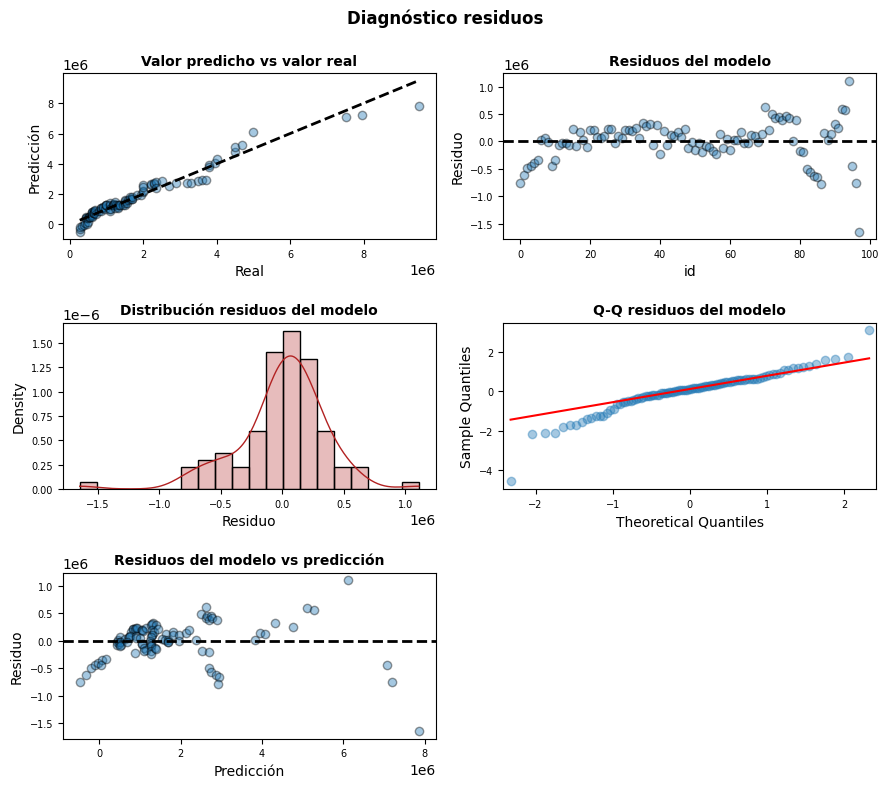

In [69]:
graficos(y_bienes,prediccion_bienes,residuos_bienes)

Y en esta ocasion los errores se distribuyen normalmente, además que aparentan ser aleatorios alrededor del 0 y al final hace una buena estimación con solo 3 variables.

# Conclusiones

En general la regresión de las bienes raices tiene el mejor ajuste, esto por la misma naturaleza de los datos, de los cuales dependemos totalmente.

Aún así en las otras regresiones podemos mejorar la aproximación escalanado nuestros valores, viendo la relevancoa de las caracteristicas, eliminando la multicolinealidad y eliminando datos que tienen alto impacto en el modelo; puesto que es complicado ajustarse a todos los puntos y algunos nos llegan a sesgar el modelo.  
Tambien recalcar la importancia de visualizar las relaciones entre las variables y el conocer del tema puedes determinar que variables tienen un gran valor explicativo y cuales llegan a ser redundantes.